# Viterbi algorithmn

We will decode an English sentence from a long sequence of non-text observations. To do so, we will implement the Viterbi algorithmn.

Consider a discrete HMM with n = 27 hidden states $S_t \in \{1, 2, . . . , 27\}$ and binary observations $O_t \in \{0, 1\}$.
Download the ASCII data files. These files contain parameter
values for the initial state distribution $π_i = P(S_1 = i)$, the transition matrix $a_{ij} = P (S_{t+1} = j|S_t = i)$, and
the emission matrix $b_{ik} = P (O_t = k|S_t = i)$, as well as a long bit sequence of T = 430000 observations.

We will use the Viterbi algorithm to compute the most probable sequence of hidden states conditioned on this particular sequence of observation

Viterbi algorithmn find the most probable state $\{s_1^*,s_2^*,s_3^*,\ldots\}$ by maximizing the log likelihood
$$\{s_1^*,s_2^*,s_3^*,\ldots\} = \argmax_{s_1,s_2,s_3, \ldots} \log P(s_1,s_2,\ldots|o_1,o_2,\ldots) = \argmax_{s_1,s_2,s_3, \ldots} \log P(s_1,s_2,\ldots,s_T,o_1,o_2,\ldots,o_T)$$
We can define the following matrix : log probability of the most likely $s_1,s_2,\ldots,s_{t-1}$ that ends up in $s_t = i$ and explains the observations $o_1,o_2,\ldots,o_t$. 
$$\delta_{t}(i) = \max_{s_1,s_2,s_3, \ldots}\log P(s_1,s_2,\ldots,s_{t-1},s_t = i,o_1,o_2,\ldots,o_t)$$

$$
\delta =
\begin{bmatrix}
\delta_1(1) & \delta_2(1) & \cdots & \delta_T(1) \\
\delta_1(2) & \delta_2(2) & \cdots & \delta_T(2) \\
\vdots      & \vdots      & \ddots & \vdots      \\
\delta_1(N) & \delta_2(N) & \cdots & \delta_T(N)
\end{bmatrix}
$$

Across rows : Number of states 

Across columns : Number of steps

The first column (in the first time step) can be found directly

$$
\delta_1(j) = \log \pi_j + \log b_j(x_1), \quad \psi_1(j) = 0 \quad \text{for } j = 1, \dots, N
$$

for $t>1$, we can find recursive relation between $\delta_t \ \text{and} \ \delta_{t-1}$. We also define a tracking matrix $\psi_t(j)$ to track the state 
$$
\delta_t(j) = \max_{i = 1,\dots,N} \left[ \delta_{t-1}(i) + \log a_{ij} \right] + \log b_j(x_t)
$$
$$
\psi_t(j) = \arg\max_{i = 1,\dots,N} \left[ \delta_{t-1}(i) + \log a_{ij} \right]
\quad \text{for } t = 2,\dots,T
$$

After reaching $t = T$, we backtrack from the maximum $\delta_T$ using $\psi_t(j)$ matrix

$$
\delta^* = \max_{j = 1,\dots,N} \delta_T(j), \quad 
s_T^* = \arg\max_{j = 1,\dots,N} \delta_T(j)
$$

**Backtracking:**

$$
s_t^* = \psi_{t+1}(s_{t+1}^*) \quad \text{for } t = T-1, T-2, \dots, 1
$$


In [293]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import string
import numpy as np
import csv
import matplotlib.pyplot as plt

In [294]:
emission=np.loadtxt('emissionMatrix.txt',delimiter='\t')
ini_dist=np.loadtxt('initialStateDistribution.txt',delimiter=' ')
transition=pd.read_csv('transitionMatrix.txt',sep=' ',header=None)
obs=pd.read_csv('observations.txt',sep=' ',header=None)

In [295]:
transition=transition.iloc[:,:-1].values
obs = np.transpose(obs.iloc[:,:-1].values.flatten())

In [296]:
def Viterbi(o,pi_ini,a,b):
    
    # Deriving the l* matrix

    l=np.zeros((pi_ini.shape[0],o.shape[0]))                 # l* matrix: nxT
    track=np.zeros((pi_ini.shape[0],o.shape[0])).astype(int)  # tracking matrix: nxT
    state =np.zeros(o.shape).astype(int)                     # Hidden states: Tx1
    
    l[:,0] = np.log(pi_ini*b[:,o[0]])                       # Initial likelihood
    log_a=np.log(a)                                         # nxn

    # Forward pass
    
    for i in range(1,o.shape[0],1):

        val = l[:,i-1][np.newaxis].T+log_a    # A new axis is necessary to make it a column vector for adding to each column of matrix (broadcasting). A transpose is taken. If this is not done, it adds to each row
        maximum = np.max(val,axis=0)
        track[:,i] = np.argmax(val,axis=0)
        l[:,i] = maximum+np.log(b[:,o[i]])

    track = track.astype(int)
    
    state[o.shape[0]-1]=np.argmax(l[:,o.shape[0]-1]).astype(int)      #Finding best likelihood value after going through T observations

    # Backtracking 
    
    for j in range(o.shape[0]-2,-1,-1):

        state[j]=track[state[j+1],j+1]

    # Converting to letters
    
    word=[chr(ord('a')+num) if num<26 else ' ' for num in state]

    index=9000*np.linspace(0,47,48).astype(int)
    string = ''.join([word[i] for i in index])
    print(string)

    plt.plot(range(o.shape[0]),state+1)
    plt.xlabel('Time')
    plt.ylabel('State')

aa house ddivided agaainst itseelf cannnot stand


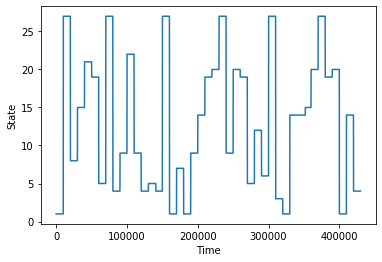

In [297]:
Viterbi(obs,ini_dist,transition,emission)